## 1. Introduction Nest
The NEST Simulator is an advanced simulation tool for computational neuroscience research. It is an open-source software designed for modeling large neural networks and studying the collective behavior of neurons, from simple networks to complex brain models.


In [1]:
import numpy as np

In [2]:
# check nest installation
import nest


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.9.0
 Built: Oct  2 2025 07:08:06

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



## 2. One neuron simulation
Concepts:
- Create neurons;
- Create input devices;
- Create output devices;
- Connect nest neurons and devices.

You can check the NEST documentation to see all the available models (https://nest-simulator.readthedocs.io/en/stable/models/index.html)

We will choose a simple conductance based leaky integrate-and-fire (LIF) neuron model for our first example (https://nest-simulator.readthedocs.io/en/stable/models/iaf_cond_alpha.html).  

**Model specifics**:

Equations for the Neuron Model:

1. **Membrane Potential Equation**:

$$
C_m \frac{dV(t)}{dt} = -g_L (V(t) - E_L) - \sum_k g_k(t) (V(t) - E_k) + I_e + I_{\text{stim}}
$$

Where:
- ( $C_m$ ) is the membrane capacitance,
- ($g_L$) is the leak conductance,
- ($E_L$) is the leak reversal potential,
- ($g_k(t)$) is the synaptic conductance (for excitatory or inhibitory synapses),
- ($E_k$) is the reversal potential for the synapse (k) (either $( E_{exc} )$ or $( E_{inh})$),
- $(I_e)$ is the external current,
- $( I_{stim})$ is the stimulus current.

2. **Synaptic Conductance Kernel for Excitatory Synapses**:

$$
g_{\text{exc}}(t) = \frac{1}{\tau_{{syn_{exc}}}} \cdot t \cdot \exp\left(-\frac{t}{\tau_{syn_{exc}}}\right)
$$

Where:
- $(\tau_{syn_{exc}})$ is the time constant for excitatory synaptic conductance.

3. **Synaptic Conductance Kernel for Inhibitory Synapses**:

$$
g_{\text{inh}}(t) = \frac{1}{\tau_{{syn_{inh}}}} \cdot t \cdot \exp\left(-\frac{t}{\tau_{{syn_{inh}}}}\right)
$$

Where:
- $( \tau_{{syn_{inh}}} )$ is the time constant for inhibitory synaptic conductance.

4. **Synaptic Currents**:

- **Excitatory Synaptic Current**:

$$
I_{{syn_{exc}}} = g_{\text{exc}}(t) \cdot (V(t) - E_{exc})
$$

- **Inhibitory Synaptic Current**:

$$
I_{{syn_{inh}}} = g_{\text{inh}}(t) \cdot (V(t) - E_{\text{inh}})
$$

- **Leak Current**:

$$
I_{\text{leak}} = g_L \cdot (V(t) - E_L)
$$

5. **Refractory Period**:

The refractory period is modeled as a timer that counts down:

$$
{refr_{t'}} = -1e3 \cdot \frac{\text{ms}}{\text{s}}
$$

After a spike, the timer starts counting down, and the neuron cannot fire again until the timer reaches zero.

In [3]:
# Generic NEST initialization
nest.ResetKernel()

In [4]:
# see model parameters
nest.GetDefaults('iaf_cond_alpha')

{'archiver_length': 0,
 'available': (0,),
 'beta_Ca': 0.001,
 'C_m': 250.0,
 'Ca': 0.0,
 'capacity': (0,),
 'dg_ex': 0.0,
 'dg_in': 0.0,
 'E_ex': 0.0,
 'E_in': -85.0,
 'E_L': -70.0,
 'element_type': 'neuron',
 'elementsize': 616,
 'frozen': False,
 'g_ex': 0.0,
 'g_in': 0.0,
 'g_L': 16.6667,
 'global_id': 0,
 'I_e': 0.0,
 'instantiations': (0,),
 'local': True,
 'model': 'iaf_cond_alpha',
 'model_id': 32,
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('g_ex', 'g_in', 't_ref_remaining', 'V_m'),
 'synaptic_elements': {},
 't_ref': 2.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 0.2,
 'tau_syn_in': 2.0,
 'thread': -1,
 'thread_local_id': -1,
 'type_id': 'iaf_cond_alpha',
 'V_m': -70.0,
 'V_reset': -60.0,
 'V_th': -55.0,
 'vp': -1}

In [5]:
# 1. Create a neuron changing some default parameters of the model
neuron = nest.Create('iaf_cond_alpha', 1, params = {'tau_syn_ex': 1., 'V_reset': -70})
# access to the parameter's variables
neuron.V_reset

-70.0

In [6]:
# which variables can you record?
print("iaf_cond_alpha recordables: {0}".format(nest.GetDefaults("iaf_cond_alpha")["recordables"]))

iaf_cond_alpha recordables: ('g_ex', 'g_in', 't_ref_remaining', 'V_m')


You can register neuron's dynamics with two type of recorders: 
1) **Multimeter**: to record dynamical variables of the model (i.e. V_m)
2) **Spike recorder**: to record the spike train

In [7]:
# 2. Create recorders
multimeter = nest.Create("multimeter",params={"interval": 0.1, "record_from": ["V_m"]}) # interval is the sampling rate
spike_recorder = nest.Create('spike_recorder')

In [8]:
# 3. Connect the recorders to the cell
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spike_recorder)

In [9]:
# 4. Create a Poisson spike generator to provide a constant-rate input to the neuron.
input_spikes = nest.Create('poisson_generator', params={'rate': 10}) # 10 Hz 
nest.Connect(input_spikes, neuron, syn_spec={"weight": 40})

In [10]:
# 5. Simulate for 1s
duration = 1000 # ms
nest.Simulate(duration)


Nov 04 11:45:44 NodeManager::prepare_nodes [Info]: 
    Preparing 4 nodes for simulation.

Nov 04 11:45:44 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 4
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Nov 04 11:45:44 SimulationManager::run [Info]: 
    Simulation finished.


In [11]:
# 6. Collect data from the recorders
V_m = multimeter.get('events')['V_m']
t = multimeter.get('events')['times']

senders = spike_recorder.get('events')['senders']
spike_train = spike_recorder.get('events')['times']

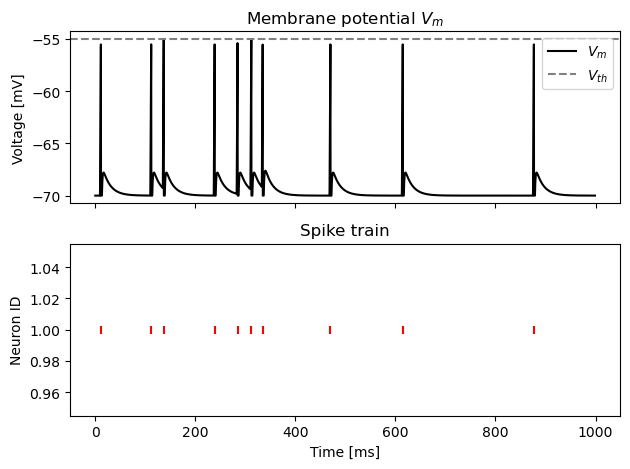

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, sharex=True) 

ax[0].set_title('Membrane potential $V_m$')
ax[0].plot(t, V_m, color='black', label='$V_m$')
ax[0].axhline(y=neuron.V_th, color='gray', linestyle='--', label='$V_{th}$')
ax[0].set_ylabel('Voltage [mV]')
ax[0].legend(loc='upper right')

# Plot spike train
ax[1].set_title('Spike train')
ax[1].scatter(spike_train, senders, color='red', marker='|')
ax[1].set_xlabel('Time [ms]')
ax[1].set_ylabel('Neuron ID')

plt.tight_layout()
plt.show()

**Exercise:** What happens if we change the Poisson rate? Compute the firing rate.

Excitatory and inhibitory inputs/outputs can be identified.

In [13]:
nest.ResetKernel()

# Input from two different Poisson generator
exc_input = nest.Create('poisson_generator', params={'rate': 20.0, 'start':100., 'stop': 500.}) 
inh_input = nest.Create('poisson_generator', params={'rate': 10.0, 'start': 600., 'stop': 1000})

In [14]:
neuron = nest.Create('iaf_cond_alpha', 1)
multimeter = nest.Create('multimeter', params={'record_from': ['V_m', 'g_ex', 'g_in']}) # record also excitatory and inhibiotry conductances
spike_recorder = nest.Create('spike_recorder')
nest.Connect(multimeter, neuron)
nest.Connect(exc_input, neuron, syn_spec={'weight':40.})
nest.Connect(inh_input, neuron, syn_spec={'weight':-20.})
nest.Simulate(1200.)


Nov 04 11:45:45 NodeManager::prepare_nodes [Info]: 
    Preparing 5 nodes for simulation.

Nov 04 11:45:45 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 5
    Simulation time (ms): 1200
    Number of OpenMP threads: 1
    Not using MPI

Nov 04 11:45:45 SimulationManager::run [Info]: 
    Simulation finished.


In [15]:
# Collect results
V_m = multimeter.get('events')['V_m']
g_ex =  multimeter.get('events')['g_ex']
g_in =  multimeter.get('events')['g_in']
time = multimeter.get('events')['times']

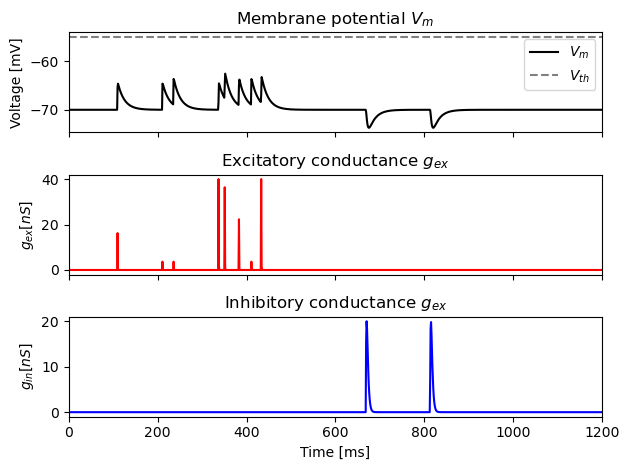

In [16]:
fig, ax = plt.subplots(3, 1, sharex=True) 

ax[0].set_title('Membrane potential $V_m$')
ax[0].plot(time, V_m, color='black', label='$V_m$')
ax[0].axhline(y=neuron.V_th, color='gray', linestyle='--', label='$V_{th}$')
ax[0].set_ylabel('Voltage [mV]')
ax[0].legend(loc='upper right')
ax[0].set_xlim(0,1200)

ax[1].set_title('Excitatory conductance $g_{ex}$')
ax[1].plot(time, g_ex, color='red')
ax[1].set_ylabel('$g_{ex} [nS]$')
ax[1].set_xlim(0,1200)

ax[2].set_title('Inhibitory conductance $g_{ex}$')
ax[2].plot(time, g_in, color='blue')
ax[2].set_ylabel('$g_{in} [nS]$')
ax[2].set_xlabel('Time [ms]')
ax[2].set_xlim(0,1200)

plt.tight_layout()
plt.show()

If you have a neuron model, you can always study its F–I curve: the relationship between input current (I) and output firing rate (F), which is essential for characterizing the neuron's behavior.
You can inject constant currents of different amplitudes and measure the resulting firing rate. 

In [53]:
nest.ResetKernel()
Is = np.arange(-200, 1000, 50)
duration = 1500.
frs = []
for I in Is:
    nest.ResetKernel()
    neuron = nest.Create('iaf_cond_alpha',1)
    current_inj = nest.Create('dc_generator', params={'amplitude':I})
    spike_rec = nest.Create('spike_recorder')
    nest.Connect(current_inj, neuron)
    nest.Connect(neuron, spike_rec)
    nest.Simulate(duration)
    fr = len(spike_rec.get()['events']['times'])/(duration/1000)
    frs.append(fr)


Nov 04 12:09:01 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Nov 04 12:09:01 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 1500
    Number of OpenMP threads: 1
    Not using MPI

Nov 04 12:09:01 SimulationManager::run [Info]: 
    Simulation finished.

Nov 04 12:09:01 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Nov 04 12:09:01 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 1500
    Number of OpenMP threads: 1
    Not using MPI

Nov 04 12:09:01 SimulationManager::run [Info]: 
    Simulation finished.

Nov 04 12:09:01 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Nov 04 12:09:01 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 1500
    Number of OpenMP threads: 1
    Not using MPI

Nov 04 12:09:01 SimulationManager::run [Info]: 
    Simulation fi

Text(0, 0.5, 'Firing rate [Hz]')

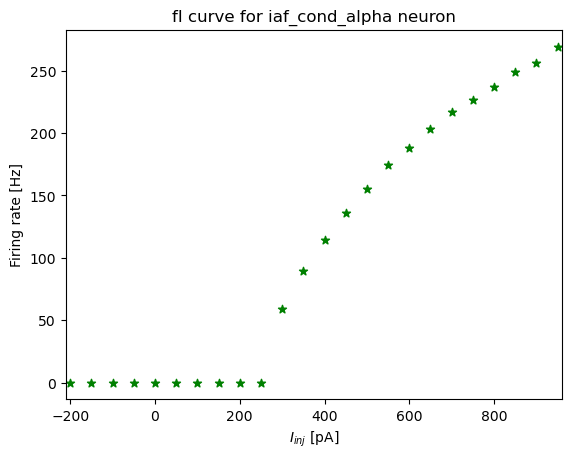

In [62]:
plt.figure()
plt.title('fI curve for iaf_cond_alpha neuron')
plt.scatter(Is, frs, marker='*', color='green')
plt.xlim(min(Is)-10, max(Is)+10)
plt.xlabel(r'$I_{inj}$ [pA]')
plt.ylabel('Firing rate [Hz]')

**Exercise:** Investigate how variations in the neuron parameters affect the shape of the F–I curve.

## 3. Two neuron simulation

In [17]:
nest.ResetKernel()

In [18]:
neuron_1 = nest.Create("iaf_psc_alpha")
neuron_2 = nest.Create("iaf_psc_alpha")

In [19]:
# Let's now assume that neuron 1 is receiving an external current
neuron_1.I_e = 400. # [pA]

**Synaptic connection** :
- Fix a weight: if the weight is positive it is an excitatory synaptic connection, otherwise if the weight is negative it is an inhibitory synaptic connection.
- Fix the delay: the delay depends by the postsynaptic receptor response.
- Synapse model: static_synapse, the weight of the connection is fixed to the given value (no plasticity).

In [20]:
weight = 20.
delay = 1.

nest.Connect(neuron_1, neuron_2, syn_spec={"synapse_model": "static_synapse", "weight": weight, "delay": delay})

In [21]:
# create a recorder for the voltage traces
voltmeter = nest.Create("voltmeter")
nest.Connect(voltmeter, neuron_1)
nest.Connect(voltmeter, neuron_2)

In [22]:
nest.Simulate(1000)


Nov 04 11:45:45 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Nov 04 11:45:45 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Nov 04 11:45:45 SimulationManager::run [Info]: 
    Simulation finished.


In [23]:
voltage_traces = voltmeter.get()['events']
sender_1 = np.where(voltage_traces['senders'] == 1) # id first neuron
sender_2 = np.where(voltage_traces['senders'] == 2) # id second neuron

# Get the voltage traces for each sender
voltage_1 = voltage_traces['V_m'][sender_1] # voltage trace neuron 1
voltage_2 = voltage_traces['V_m'][sender_2] # voltage trace neuron 2

# Get the times for each sender
times_1 = voltage_traces['times'][sender_1]
times_2 = voltage_traces['times'][sender_2]

Text(0, 0.5, 'V_m [mV]')

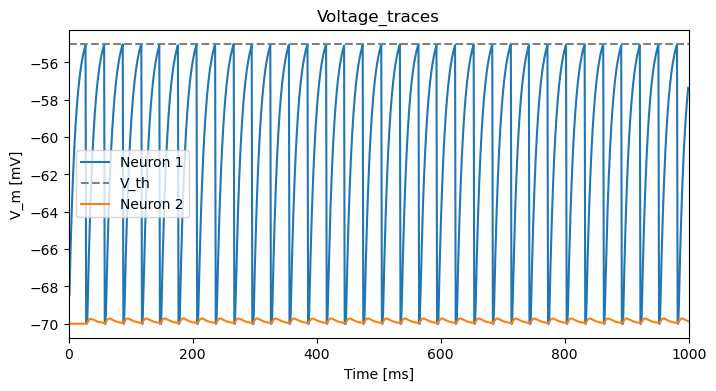

In [24]:
plt.figure(figsize=(8,4))
plt.title('Voltage_traces')
plt.plot(times_1, voltage_1, label = 'Neuron 1')
plt.axhline(neuron_1.V_th, color='gray', linestyle = '--', label='V_th')
plt.plot(times_2, voltage_2, label = 'Neuron 2')
plt.legend()
plt.xlim(0,1000)
plt.xlabel('Time [ms]')
plt.ylabel('V_m [mV]')

Text(0, 0.5, 'V_m [mV]')

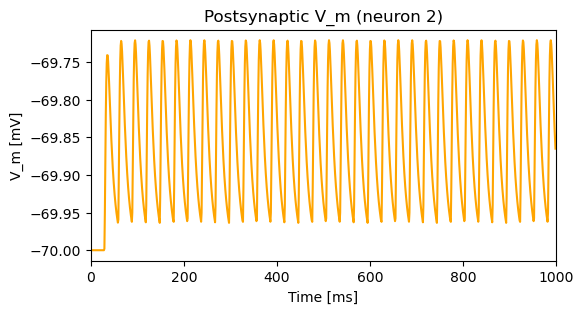

In [25]:
# focus on postsynaptic neuron (neuron 2): let's look at the postsynaptic activity in neuron_2 evoked by the spikes of neuron_1
plt.figure(figsize=(6,3))
plt.title('Postsynaptic V_m (neuron 2)')
plt.plot(times_2, voltage_2, color='orange')
plt.xlim(0,1000)
plt.xlabel('Time [ms]')
plt.ylabel('V_m [mV]')

## 4. Populations of neurons

Choose always delay and weigths for the connections between each couple of neuron. In addition, a connectivity strategy between presynaptic and postsynaptic population must be choosen.
See the documentation for all the connectivity strategies available in NEST (https://nest-simulator.readthedocs.io/en/stable/synapses/connectivity_concepts.html#synapses-connectivity-concepts--page-root).

Here we choose the rule **fixed_indegree**: each postsynaptic neuron is connected with a fixed number of presynaptic neuron, choosen randomly.

In [26]:
nest.ResetKernel()

In [27]:
# create two population of neuron 
exc_pop = nest.Create('iaf_psc_alpha', 100, params={'I_e':200., "tau_m":20.}) # 100 E neurons
inh_pop = nest.Create('iaf_psc_alpha', 30, params={'I_e':400.}) # 30 I neurons

In [28]:
# define connectivity rules between the two populations: E->I, I->E

# each I neuron is connected to 20 E neurons
nest.Connect(exc_pop, inh_pop, {'rule':'fixed_indegree', 'indegree': 20}, syn_spec={'weight': 2.0, 'delay':1.}) 

# each E neuron is connected to 10 I neurons
nest.Connect(inh_pop, exc_pop, {'rule':'fixed_indegree', 'indegree': 10}, syn_spec={'weight': -4.0, 'delay':1.})

In [29]:
# Define a spike recorder for each population 

sr_E=nest.Create('spike_recorder')
nest.Connect(exc_pop,sr_E)
sr_I=nest.Create('spike_recorder')
nest.Connect(inh_pop,sr_I)

In [30]:
# introduce variability across neurons 

Vth=-55.
Vrest=-70.
dVms_e =  {"V_m": [Vrest+(Vth-Vrest)*np.random.rand() for x in range(len(exc_pop))]}
exc_pop.set(dVms_e)
dVms_i =  {"V_m": [Vrest+(Vth-Vrest)*np.random.rand() for x in range(len(inh_pop))]}
inh_pop.set(dVms_i)

In [31]:
nest.Simulate(1000.)


Nov 04 11:45:45 NodeManager::prepare_nodes [Info]: 
    Preparing 132 nodes for simulation.

Nov 04 11:45:45 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 132
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Not using MPI

Nov 04 11:45:45 SimulationManager::run [Info]: 
    Simulation finished.


(0.0, 1000.0)

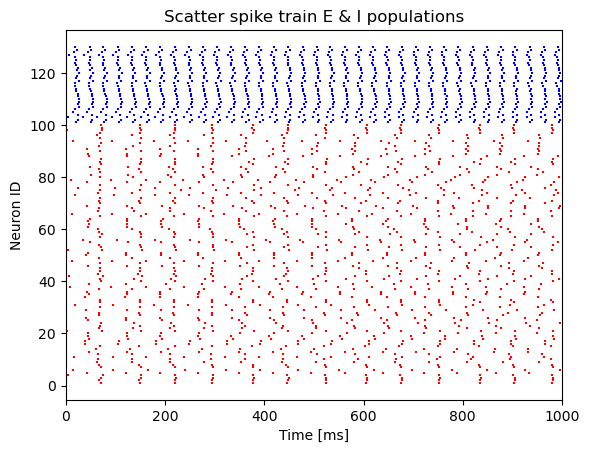

In [34]:
# plot raster for both populations
id_E = sr_E.get()['events']['senders']
t_E = sr_E.get()['events']['times']

id_I = sr_I.get()['events']['senders']
t_I = sr_I.get()['events']['times']

plt.figure()
plt.title('Scatter spike train E & I populations')
plt.scatter(t_e,id_E, marker='|',s=3, color ='r')
plt.scatter(t_I,id_I, marker='|',s=3, color ='b')   
plt.xlabel('Time [ms]')
plt.ylabel('Neuron ID')
plt.xlim(0,1000.)

**Excercise:**: Try to change tha values of the two indegrees for the connections E->I , I->E

Compute the mean firing rate for each population, as:

$$ \frac{total \ number \ of \ spikes}{number \ of\ neurons\ x \ duration \ in \ s}$$

In [35]:
n_e = len(t_E)
n_i = len(t_I)
fr_e = n_e/(100*(duration/1000))
print('The firing rate of the excitatory population is: ', fr_e)
fr_i = n_i/(30*(duration/1000))
print('The firing rate of the inhibitory population is: ', fr_i)

The firing rate of the excitatory population is:  13.24
The firing rate of the inhibitory population is:  35.0


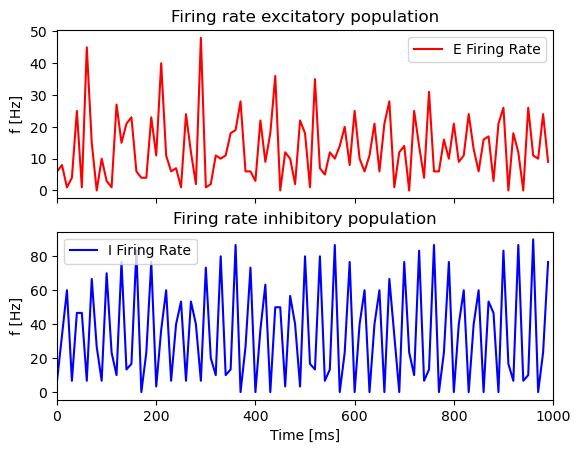

In [42]:
# plot instantaneous mean firing rate
bin_size = 10 # ms
bins = np.arange(0,1000.+bin_size,bin_size)

# define spike counts for the two population
spike_count_E, _ = np.histogram(t_E, bins)
spike_count_I, _ = np.histogram(t_I, bins)

n_E= 100
n_I = 30 
fr_E = spike_count_E / (bin_size / 1000.0 * n_E)
fr_I = spike_count_I / (bin_size / 1000.0 * n_I)

fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].set_title('Firing rate excitatory population')
ax[0].plot(bins[:-1], fr_E, label='E Firing Rate', color='r')
ax[0].set_ylabel('f [Hz]')
ax[0].set_xlim(0,1000)
ax[0].legend()

ax[1].set_title('Firing rate inhibitory population')
ax[1].plot(bins[:-1], fr_I, label='I Firing Rate', color='b')
ax[1].set_xlabel('Time [ms]')
ax[1].set_ylabel('f [Hz]')
ax[1].set_xlim(0,1000)
ax[1].legend()

plt.show()